In [2]:
import pandas as pd

# Cargar los datos de ventas
file_path = './ventas_sinteticas.csv'  # Reemplaza con la ruta correcta
df = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame
df.head()

,Fecha,Producto,Categoría,Región,Precio,Unidades Vendidas
0,2023-01-01,Producto A,Ropa,Oeste,95.56,55
1,2023-01-01,Producto B,Ropa,Sur,24.04,52
2,2023-01-01,Producto C,Hogar,Norte,97.29,58
3,2023-01-01,Producto D,Juguetes,Oeste,26.51,46
4,2023-01-02,Producto A,Juguetes,Norte,36.21,52


In [3]:
# Convertir la columna 'Fecha' al tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Verificar si hay valores duplicados y eliminarlos si es necesario
duplicados = df.duplicated().sum()
df = df.drop_duplicates()

# Verificar la estructura de los datos después de la limpieza
df.info(), duplicados


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Fecha              1460 non-null   datetime64[ns]
 1   Producto           1460 non-null   object        
 2   Categoría          1460 non-null   object        
 3   Región             1460 non-null   object        
 4   Precio             1460 non-null   float64       
 5   Unidades Vendidas  1460 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 79.8+ KB


(None, 0)

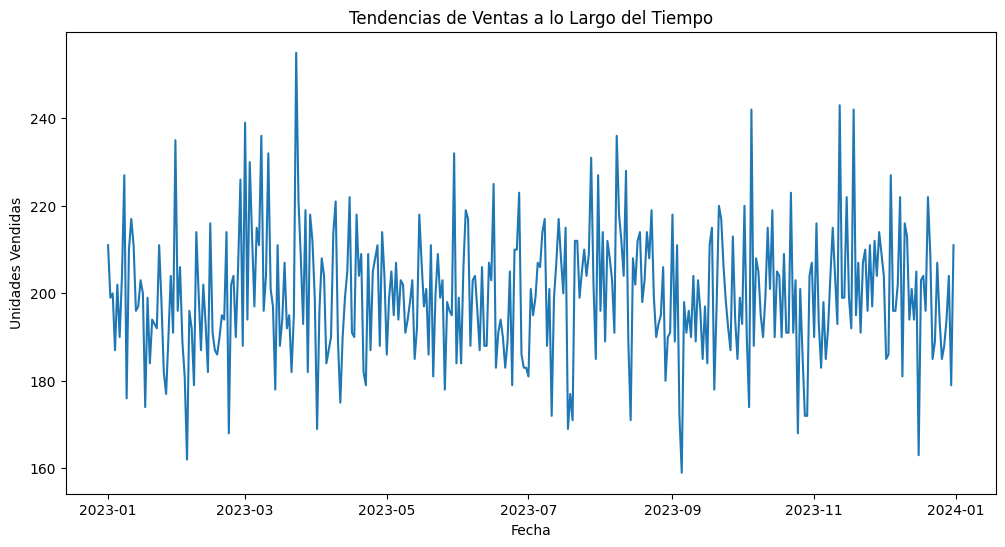

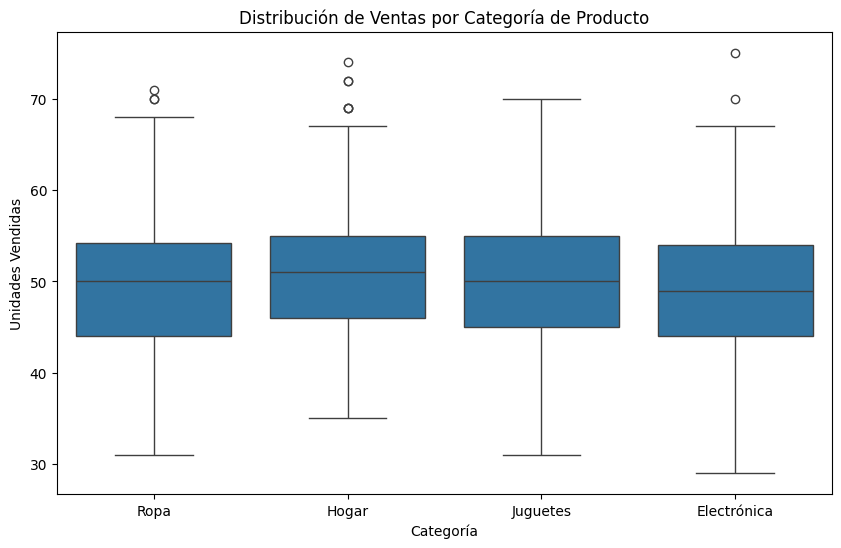

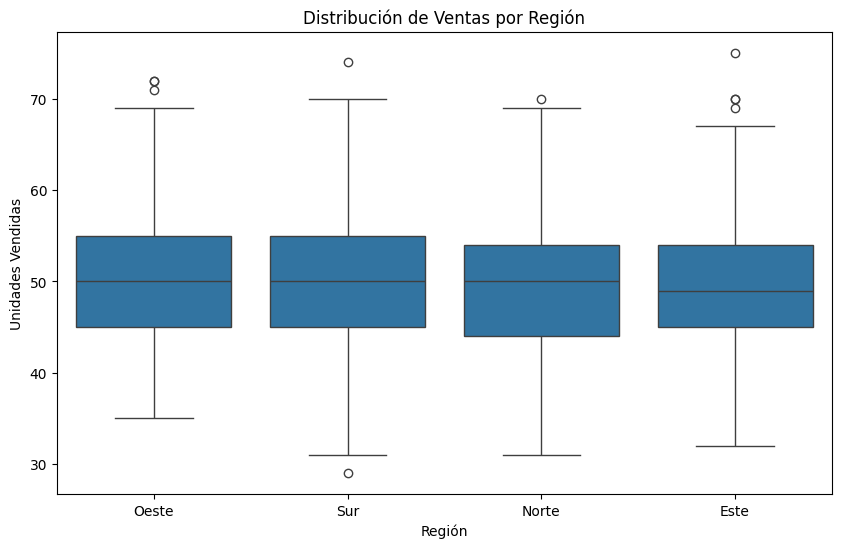

,Precio,Unidades Vendidas
count,1460.000000,1460.000000
mean,54.515137,49.920548
std,26.225869,7.234578
min,10.000000,29.000000
25%,31.632500,45.000000
50%,53.865000,50.000000
75%,76.977500,55.000000
max,99.960000,75.000000


In [4]:
# Generar estadísticas descriptivas
estadisticas_descriptivas = df.describe()

# Visualizar las tendencias de ventas a lo largo del tiempo
import matplotlib.pyplot as plt
import seaborn as sns

# Ventas totales por fecha
ventas_por_fecha = df.groupby('Fecha')['Unidades Vendidas'].sum()

# Crear el gráfico de ventas por fecha
plt.figure(figsize=(12, 6))
sns.lineplot(data=ventas_por_fecha)
plt.title('Tendencias de Ventas a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Unidades Vendidas')
plt.show()

# Distribución de las ventas por categoría de producto
plt.figure(figsize=(10, 6))
sns.boxplot(x='Categoría', y='Unidades Vendidas', data=df)
plt.title('Distribución de Ventas por Categoría de Producto')
plt.xlabel('Categoría')
plt.ylabel('Unidades Vendidas')
plt.show()

# Distribución de las ventas por región
plt.figure(figsize=(10, 6))
sns.boxplot(x='Región', y='Unidades Vendidas', data=df)
plt.title('Distribución de Ventas por Región')
plt.xlabel('Región')
plt.ylabel('Unidades Vendidas')
plt.show()

estadisticas_descriptivas


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
23:28:23 - cmdstanpy - INFO - Chain [1] start processing
23:28:24 - cmdstanpy - INFO - Chain [1] done processing


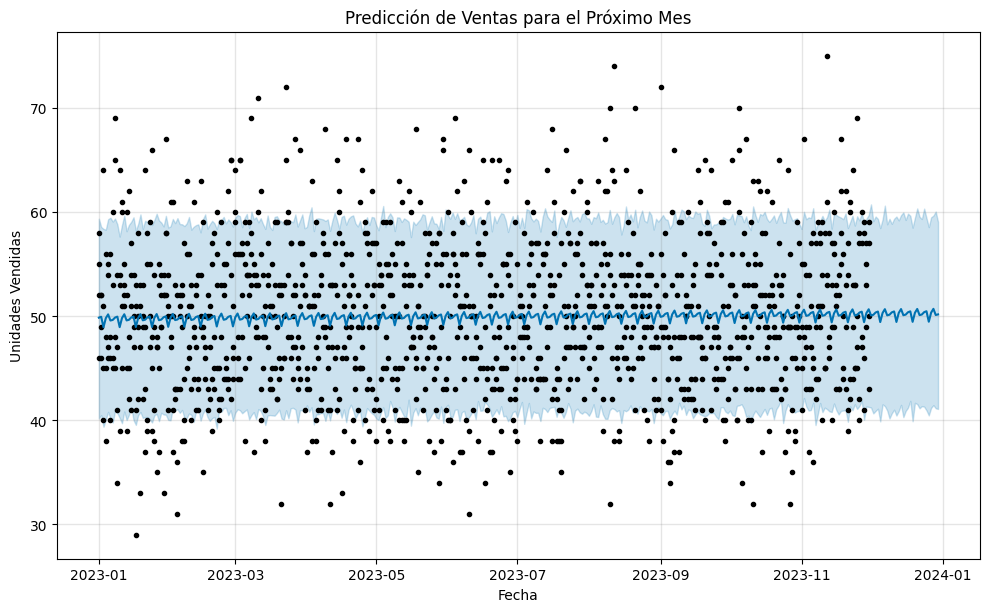

In [7]:
from prophet import Prophet

# Preparación de los datos para Prophet
df_prophet = df[['Fecha', 'Unidades Vendidas']].rename(columns={'Fecha': 'ds', 'Unidades Vendidas': 'y'})

# Dividir los datos en entrenamiento y prueba (hasta el penúltimo mes para entrenamiento)
train = df_prophet[df_prophet['ds'] < '2023-12-01']
test = df_prophet[df_prophet['ds'] >= '2023-12-01']

# Crear y entrenar el modelo Prophet
model = Prophet()
model.fit(train)

# Hacer una predicción para el próximo mes
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Visualizar el forecast
fig = model.plot(forecast)
plt.title('Predicción de Ventas para el Próximo Mes')
plt.xlabel('Fecha')
plt.ylabel('Unidades Vendidas')
plt.show()
